In [23]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture3')      
except Exception:
  pass

Cloning into 'DLCV_CLASS'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 304 (delta 74), reused 154 (delta 51), pack-reused 127
Receiving objects: 100% (304/304), 36.26 MiB | 2.44 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import clear_output
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## How to install python-opencv

You can install opencv-python with pip Easily.

$ pip install python-opencv              #기본 opencv install

$ pip install python-contrib-opencv      #opencv contribution package install

Note. pip-installable opencv는 모든 module을 가지고 있지 않음!

특히  video 관련 module은 무겁기 때문에 빠져있음.

Full version 설치를 원할 경우 cmake compile을 통해 .so file을 생성해야함 (https://github.com/opencv/opencv)

## opencv tutorial
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

## 1. read/write color images

it is pretty safe to assume that opencv always represent images as uint8 (ubyte) ndarray

type : <class 'numpy.ndarray'>
shape : (233, 350, 3)
min and max : 0 255


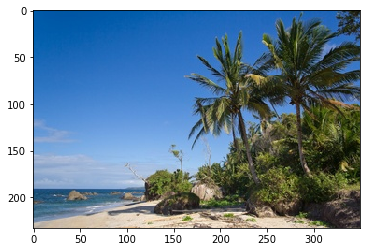

In [25]:
## RGB images - BGR to RGB
beach = cv2.imread("data/beach.jpg")[:,:,::-1]
print('type :', beach.__class__)
print('shape :', beach.shape)
print('min and max :', beach.min(), beach.max())
plt.imshow(beach)

## 2. Image split
numpy array split example

In [26]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print("2x3 array\n", arr)
print("2x2 array split\n", arr[0:2, 0:2])

2x3 array
 [[1 2 3]
 [4 5 6]]
2x2 array split
 [[1 2]
 [4 5]]


Image split practice

beach[]에 적절한 index 넣기

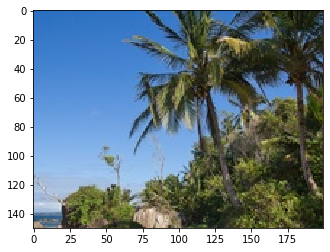

In [27]:
new_beach = beach[50:200, 100:300, :] # 맨마지막 콜론 지워도 똑같음
plt.imshow(new_beach)

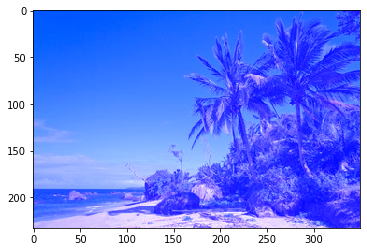

In [28]:
## manipulate pixles - cv2 store them as bgr instead of rgb
imm = beach.copy() # 따로 메모리 할당을 하기위해 카피를 쓰는 거임
imm[:, :, 2] = 255
plt.imshow(imm)

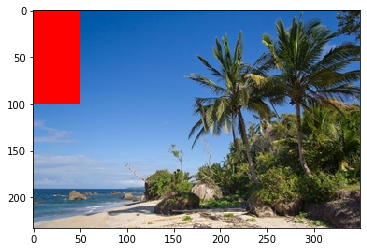

In [29]:
## manipulate pixles 
imm = beach.copy()
imm[:100, :50] = (255, 0, 0) # red corner
plt.imshow(imm)

## 3. read gray images

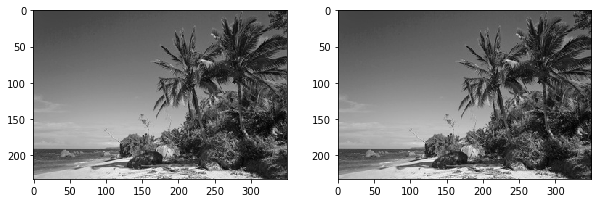

In [30]:
## gray scale - either load it directly
beach_gray = cv2.imread("data/beach.jpg", cv2.IMREAD_GRAYSCALE)

## or convert later - note beach is RGB now
beach_gray_converted = cv2.cvtColor(beach, cv2.COLOR_RGB2GRAY)

## there are slight differences between the two versions
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(beach_gray, cmap = plt.cm.gray)
axes[1].imshow(beach_gray_converted, cmap = plt.cm.gray)

In [31]:
## save and convert to different formats - Notice it assumes BGR
cv2.imwrite("beach_new.jpg", beach[:,:,::-1])

True

## 4. drawing on images

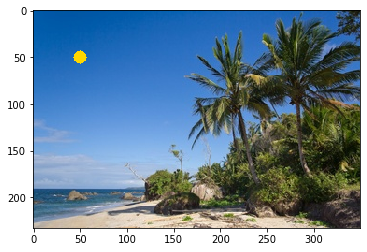

In [32]:
sunny_beach = beach.copy()
cv2.circle(sunny_beach, (50, 50), 7, color = (255, 215, 0), thickness = -1, )
plt.imshow(sunny_beach)

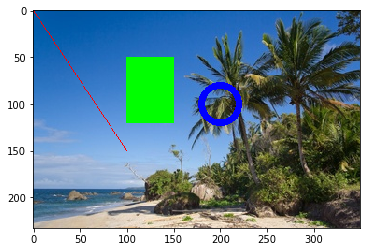

In [33]:
imm = beach.copy()
## params: img, (x1, y1), (x2, y2), color (of the current img channel repr.)
cv2.line(imm, (0, 0), (100, 150), (255, 0, 0), ) #red line
cv2.circle(imm, (200, 100), 20, color = (0, 0, 255), thickness=5) #blue circle
## filled rectangle
cv2.rectangle(imm, (100, 50), (150, 120), color = (0, 255, 0), thickness = -1)
plt.imshow(imm)

# Opencv python tutorial
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html